In [50]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

n_dots = 20

x = np.linspace(0, 1, n_dots)                   # [0, 1] 之间创建 20 个点
y = np.sqrt(x) + 0.2*np.random.rand(n_dots) - 0.1;

In [58]:
def plot_polynomial_fit(x, y, order):
    p = np.poly1d(np.polyfit(x, y, order))

    # 画出拟合出来的多项式所表达的曲线以及原始的点
    t = np.linspace(0, 1, 200)
    plt.plot(x, y, 'ro', t, p(t), '-', t, np.sqrt(t), 'r--')
    return p

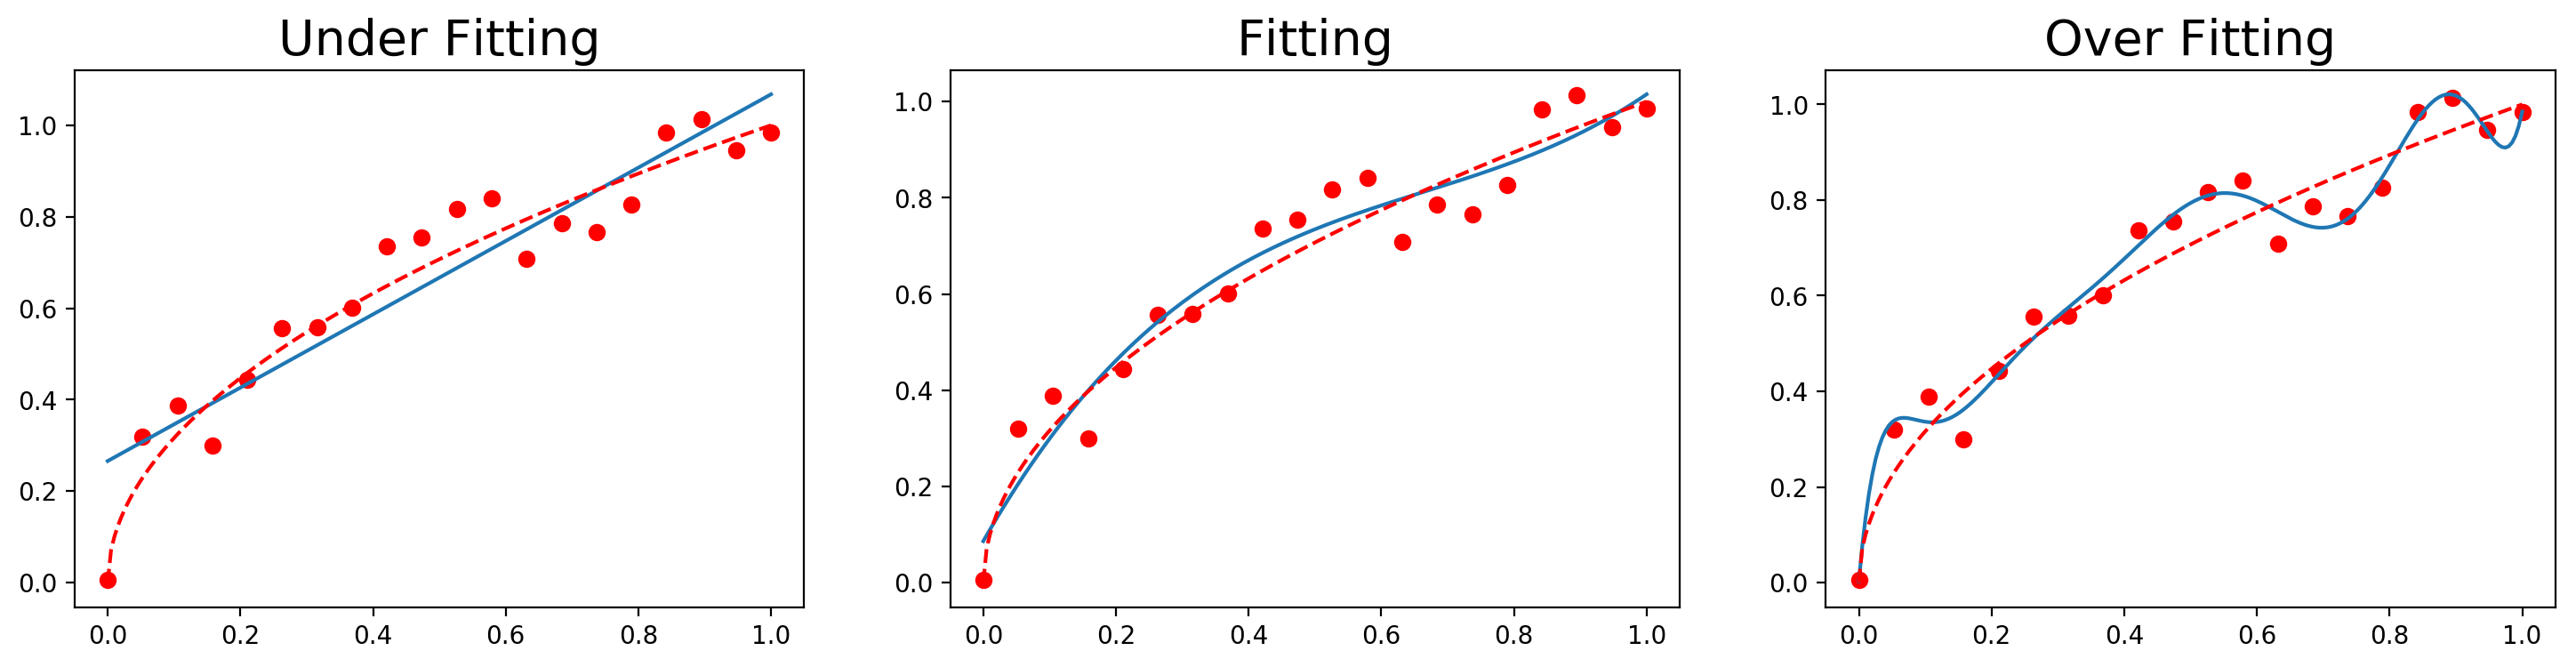

In [59]:
plt.figure(figsize=(18, 4), dpi=200)
titles = ['Under Fitting', 'Fitting', 'Over Fitting']
models = [None, None, None]
for index, order in enumerate([1, 3, 10]):
    plt.subplot(1, 3, index + 1)
    models[index] = plot_polynomial_fit(x, y, order)
    plt.title(titles[index], fontsize=20)

In [62]:
for m in models:
    print('model coeffs: {0}'.format(m.coeffs))

model coeffs: [ 0.80191994  0.26587792]
model coeffs: [ 1.49939008 -2.98459755  2.41422251  0.08619682]
model coeffs: [ -1.53591236e+03   1.31478122e+04  -4.05657056e+04   6.41981822e+04
  -5.91358966e+04   3.33238289e+04  -1.15820500e+04   2.41274101e+03
  -2.77783797e+02   1.57663069e+01   2.95464137e-03]


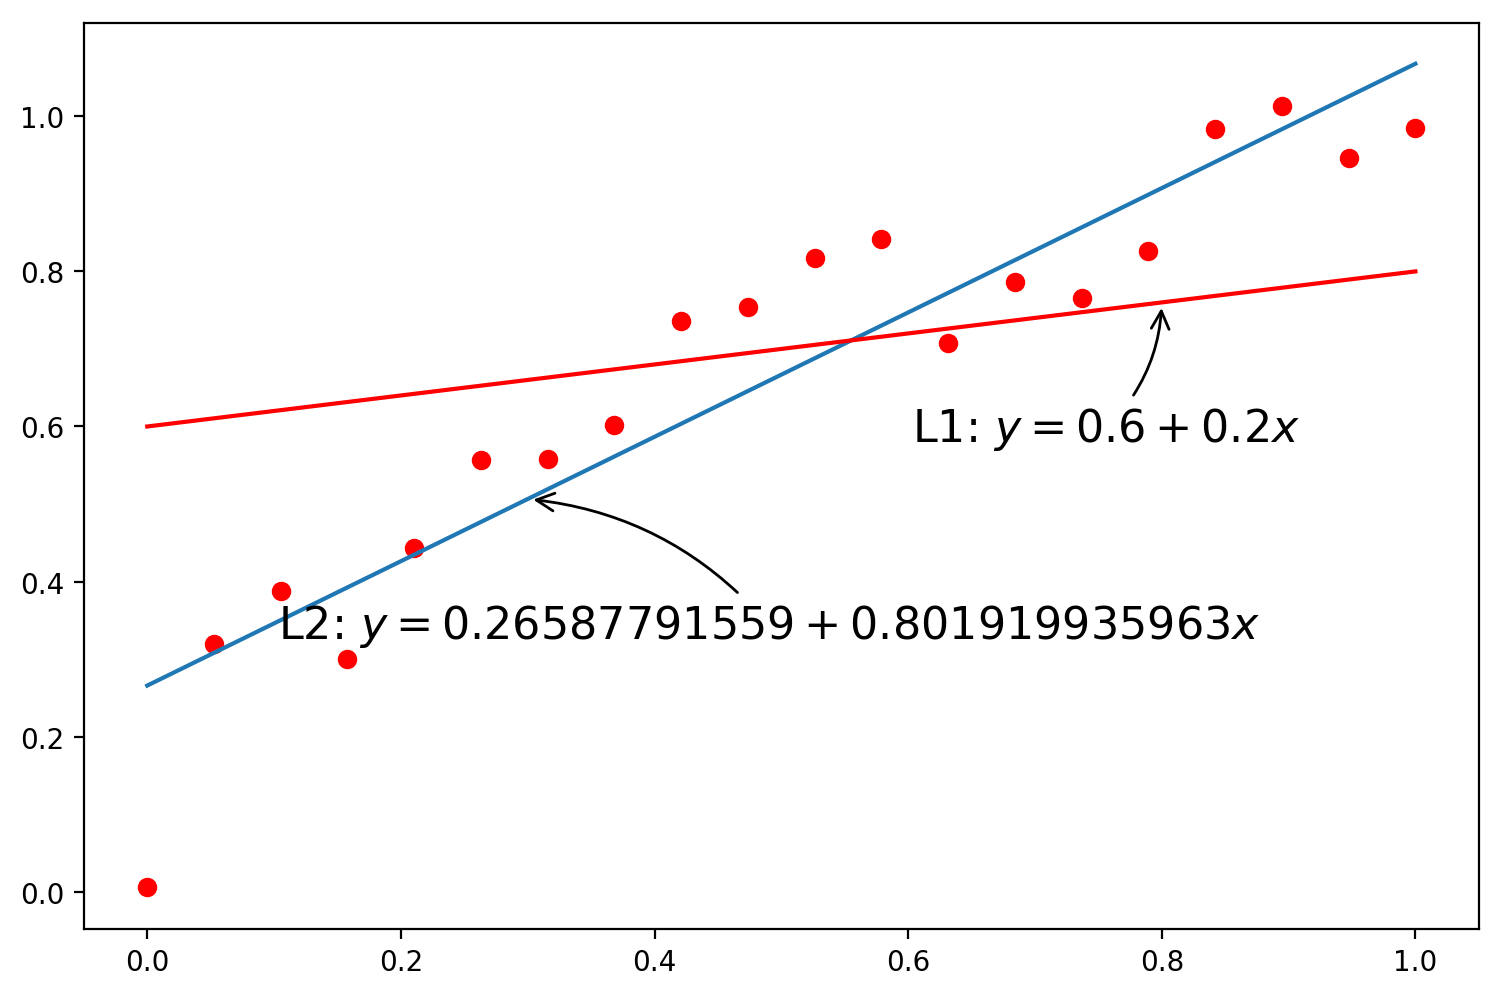

In [63]:
# 针对一阶多项式的模型，不同的参数拟合出来的直线和训练样本对应的位置关系
coeffs_1d = [0.2, 0.6]

plt.figure(figsize=(9, 6), dpi=200)
t = np.linspace(0, 1, 200)
plt.plot(x, y, 'ro', t, models[0](t), '-', t, np.poly1d(coeffs_1d)(t), 'r-')
plt.annotate(r'L1: $y = {1} + {0}x$'.format(coeffs_1d[0], coeffs_1d[1]),
             xy=(0.8, np.poly1d(coeffs_1d)(0.8)), xycoords='data',
             xytext=(-90, -50), textcoords='offset points', fontsize=16,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))
plt.annotate(r'L2: $y = {1} + {0}x$'.format(models[0].coeffs[0], models[0].coeffs[1]),
             xy=(0.3, models[0](0.3)), xycoords='data',
             xytext=(-90, -50), textcoords='offset points', fontsize=16,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))